In [1]:
import pandas as pd
import numpy as np

In [2]:
mars_df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
mars_df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [4]:
mars_df = mars_df[0]
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [5]:
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [6]:
mars_df['terrestrial_date'] = mars_df['terrestrial_date'].astype('datetime64[ns]')

In [7]:
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [10]:
# How many months exist on Mars?

Total_month = len(mars_df['month'].unique())
Total_month

12

In [11]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?
Martian_days = mars_df['sol'].nunique()
Martian_days

1867

<AxesSubplot:xlabel='month'>

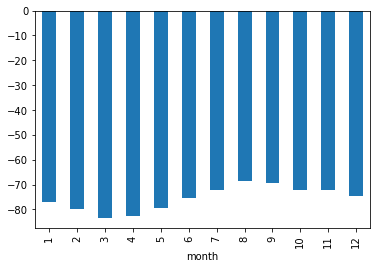

In [13]:
# What are the coldest and the warmest months on Mars (at the location of Curiosity)? 
#Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.
min_daily_temp = mars_df.groupby(['month']).mean()['min_temp']
min_daily_temp.plot(kind='bar')

### The warmest months are 8 & 9, While the coldest months are 3 & 4

<AxesSubplot:xlabel='month'>

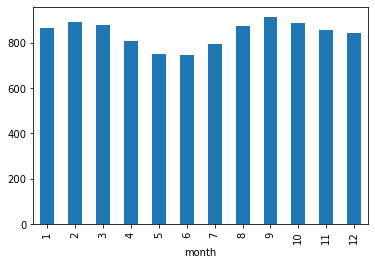

In [14]:
#Which months have the lowest and the highest atmospheric pressure on Mars? 
#Get the answer by averaging the daily atmospheric pressure of all the months. 
#Plot the results as a bar chart.
avg_daily_pressure = mars_df.groupby(['month']).mean()['pressure']
avg_daily_pressure.plot(kind='bar')

### The months with lowest avg. pressure are 5 & 6, While the months with the highest avg. pressure are 2 & 9

In [ ]:
#About how many terrestrial (Earth) days exist in a Martian year? 
#That is, in the time that Mars circles the Sun once, how many days elapse on Earth? 
#Visually estimate the result by plotting the daily minimum temperature.

<AxesSubplot:>

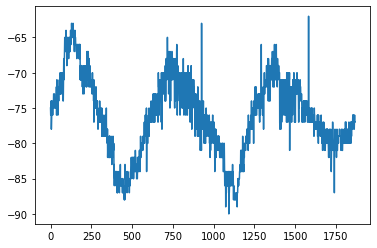

In [15]:
mars_df['min_temp'].plot()

<AxesSubplot:>

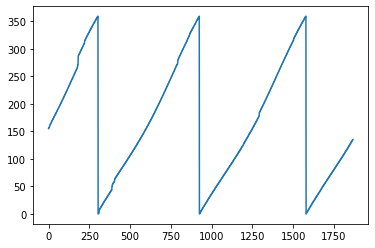

In [16]:
mars_df['ls'].plot()

In [17]:
mars_df[mars_df['ls']==0]['sol']

304      351
305      352
925     1019
926     1020
1579    1688
1580    1689
Name: sol, dtype: int64

In [18]:
1019 - 351 

668

In [19]:
1688 - 1019


669

In [20]:
mars_df.to_csv('mars_data.csv', index=False)